## <i> Predicting Cryptocurrency Stock Prices Using Advanced Machine Learning Algorithms </i>
## <i>Import The Library Files</i>

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [21]:
df = pd.read_csv("12 (2) (Data).csv")

## <i> Dataset Overview </i>

In [22]:
df

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT
0,1.640560e+12,12-27-2021,XRP-USDT,0.92000,0.92370,0.92000,0.92260,2.384512e+06,2.198450e+06
1,1.640480e+12,12-26-2021,XRP-USDT,0.92520,0.93340,0.90520,0.92000,1.634385e+08,1.499400e+08
2,1.640390e+12,12-25-2021,XRP-USDT,0.91140,0.93500,0.89810,0.92520,2.500749e+08,2.302303e+08
3,1.640300e+12,12-24-2021,XRP-USDT,0.99410,0.99660,0.89640,0.91150,5.672341e+08,5.377035e+08
4,1.640220e+12,12-23-2021,XRP-USDT,0.95380,1.01670,0.93720,0.99410,4.794362e+08,4.729372e+08
...,...,...,...,...,...,...,...,...,...
1329,1.525740e+12,5-8-2018,XRP-USDT,0.82490,0.84802,0.79200,0.80667,1.297130e+07,1.057184e+07
1330,1.525650e+12,5-7-2018,XRP-USDT,0.86482,0.86886,0.80000,0.82490,1.730349e+07,1.419228e+07
1331,1.525560e+12,5-6-2018,XRP-USDT,0.90280,0.91800,0.83774,0.86483,1.600204e+07,1.399714e+07
1332,1.525480e+12,5-5-2018,XRP-USDT,0.88980,0.93500,0.88800,0.90280,1.681617e+07,1.528200e+07


In [23]:
df.describe()

,unix,open,high,low,close,Volume XRP,Volume USDT
count,1.334000e+03,1334.000000,1334.000000,1334.000000,1334.000000,1.334000e+03,1.334000e+03
mean,1.582978e+12,0.473318,0.495597,0.450075,0.473632,3.567016e+08,2.356279e+08
std,3.328447e+10,0.319903,0.341216,0.297513,0.320127,5.914574e+08,4.840987e+08
min,1.525390e+12,0.135360,0.149380,0.101290,0.135490,2.384512e+06,2.198450e+06
25%,1.554182e+12,0.256295,0.263605,0.250050,0.256343,6.448872e+07,1.894323e+07
50%,1.582975e+12,0.326050,0.337595,0.315500,0.326050,1.480822e+08,4.136179e+07
75%,1.611770e+12,0.565155,0.599938,0.528917,0.566190,3.779833e+08,2.519194e+08
max,1.640560e+12,1.833960,1.966890,1.652430,1.834680,8.608358e+09,4.589984e+09


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unix         1334 non-null   float64
 1   date         1334 non-null   object 
 2   symbol       1334 non-null   object 
 3   open         1334 non-null   float64
 4   high         1334 non-null   float64
 5   low          1334 non-null   float64
 6   close        1334 non-null   float64
 7   Volume XRP   1334 non-null   float64
 8   Volume USDT  1334 non-null   float64
dtypes: float64(7), object(2)
memory usage: 93.9+ KB


### <i> Data Preprocessing </i>

In [25]:
# 3. Convert Data Types
# Convert 'date' column to datetime
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

# 4. Sort the Data
# Sort by date for time-series consistency (if applicable)
df = df.sort_values(by='date')

# 5. Feature Engineering
# Add meaningful features
df['price_change'] = df['close'] - df['open']
df['price_change_percentage'] = ((df['close'] - df['open']) / df['open']) * 100
df['volatility'] = df['high'] - df['low']  # High-Low range
df['average_price'] = (df['high'] + df['low']) / 2

# Drop columns that may cause target leakage
features_to_drop = ['close', 'price_change']  # 'close' is the target, 'price_change' depends on 'close'
df_features = df.drop(columns=features_to_drop, errors='ignore')


### <i> Expolatory Data Analysis ( EDA ) </i>

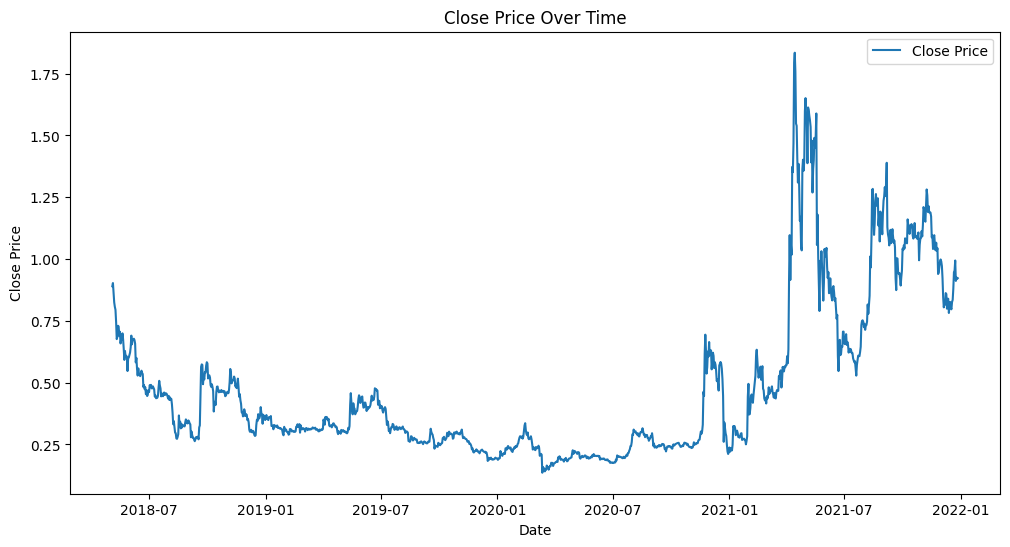

In [26]:
# Visualization Preparation
# 1. Line plot of 'close' prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='close', data=df, label='Close Price')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

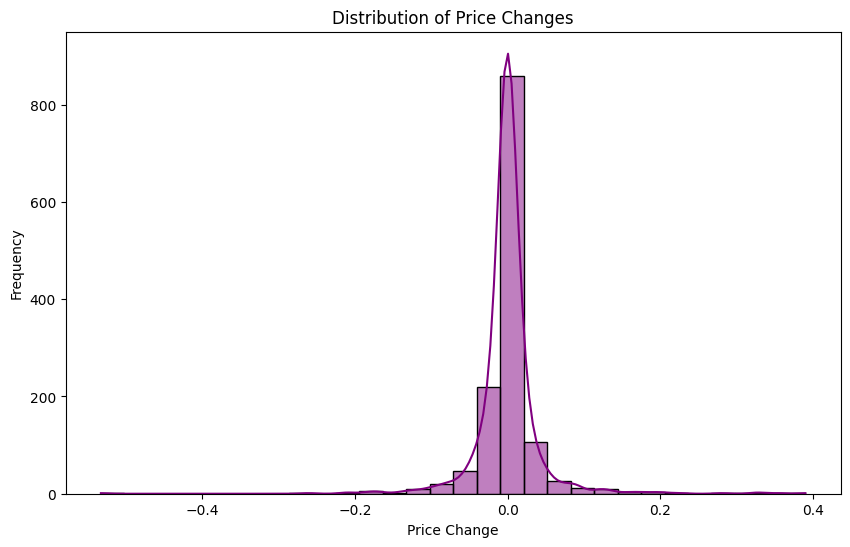

In [27]:
# 2. Distribution of price changes
plt.figure(figsize=(10, 6))
sns.histplot(df['price_change'], kde=True, bins=30, color='purple')
plt.title('Distribution of Price Changes')
plt.xlabel('Price Change')
plt.ylabel('Frequency')
plt.show()

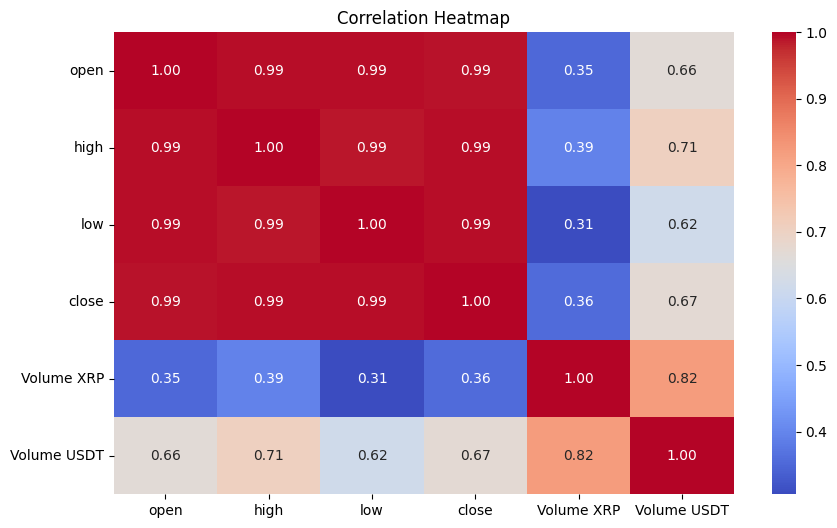

In [28]:
# 3. Correlation heatmap
correlation_matrix = df[['open', 'high', 'low', 'close', 'Volume XRP', 'Volume USDT']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

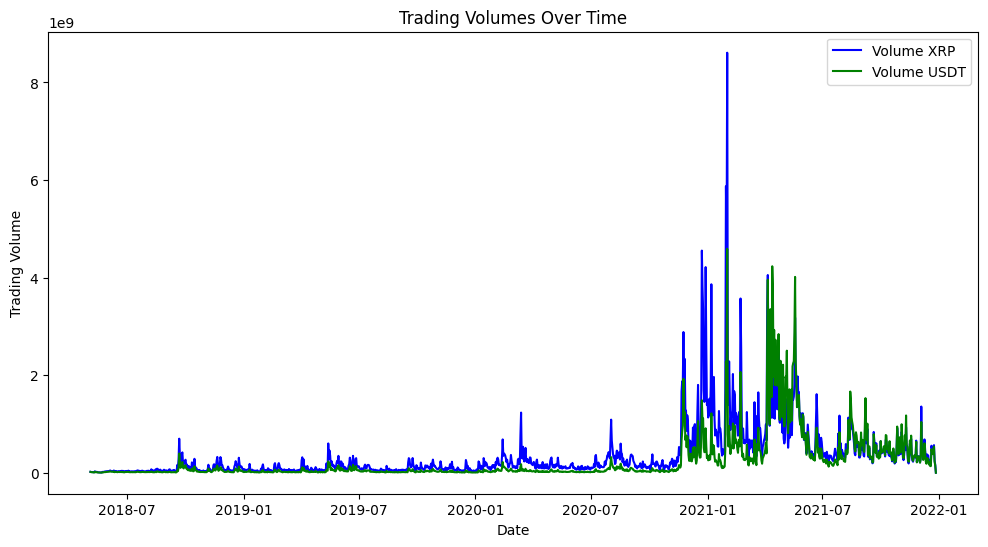

In [29]:
# 4. Daily trading volumes (XRP vs. USDT)
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='Volume XRP', data=df, label='Volume XRP', color='blue')
sns.lineplot(x='date', y='Volume USDT', data=df, label='Volume USDT', color='green')
plt.title('Trading Volumes Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.legend()
plt.show()

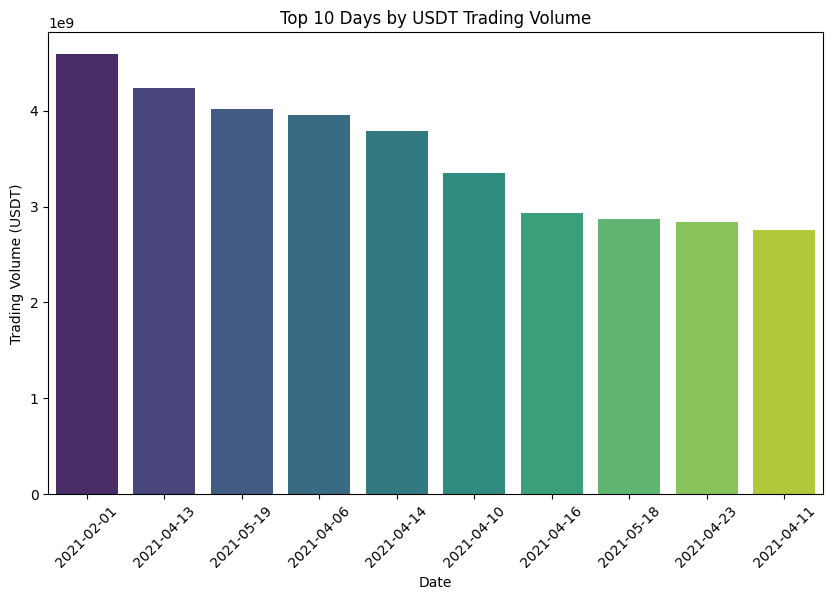

In [30]:
# 3. **Top N Days by Trading Volume**
top_n_volume = df.nlargest(10, 'Volume USDT')
plt.figure(figsize=(10, 6))
sns.barplot(x='date', y='Volume USDT', data=top_n_volume, palette='viridis')
plt.title('Top 10 Days by USDT Trading Volume')
plt.xlabel('Date')
plt.ylabel('Trading Volume (USDT)')
plt.xticks(rotation=45)
plt.show()

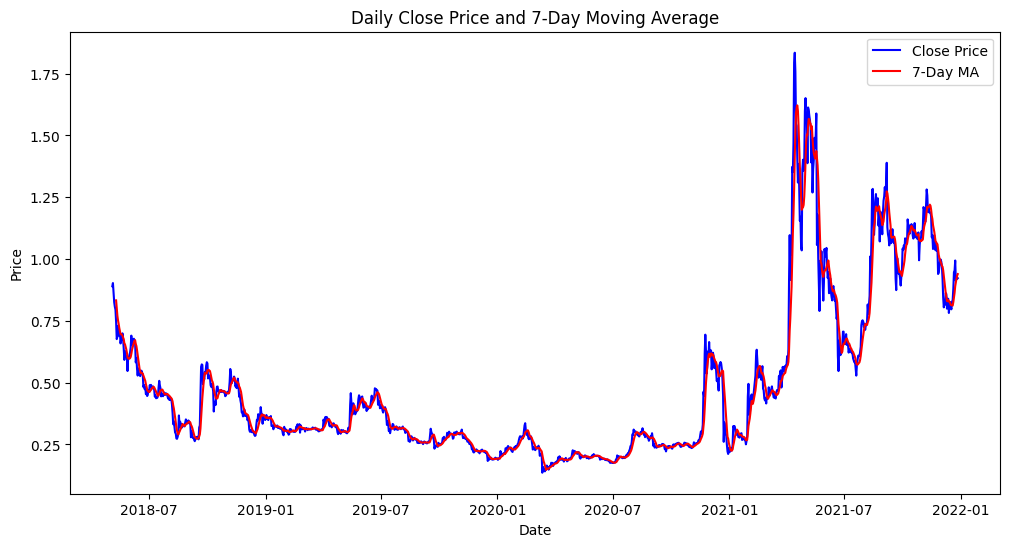

In [31]:
# 5. **Daily Close Price and Moving Average**
df['7_day_MA'] = df['close'].rolling(window=7).mean()  # 7-day moving average
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='close', data=df, label='Close Price', color='blue')
sns.lineplot(x='date', y='7_day_MA', data=df, label='7-Day MA', color='red')
plt.title('Daily Close Price and 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
features = ['open', 'high', 'low', 'Volume XRP', 'Volume USDT']
target = 'close'

# Define a threshold (e.g., the median value of the 'close' column)
threshold = df['close'].median()

# Create a new target column for classification
df['close_class'] = np.where(df['close'] >= threshold, 1, 0)


# Update the target variable for classification
target = 'close_class'

X = df[features]
y = df[target]

# 8. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


### Models
### Logistic Regression

Logistic Regression Classification Report Results:
[[134   1]
 [  6 126]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       135
           1       0.99      0.95      0.97       132

    accuracy                           0.97       267
   macro avg       0.97      0.97      0.97       267
weighted avg       0.97      0.97      0.97       267

Accuracy: 0.9737827715355806
Logistic Regression Classification Report Results:
Training Accuracy: 0.98
Test Accuracy: 0.97
Well-fit



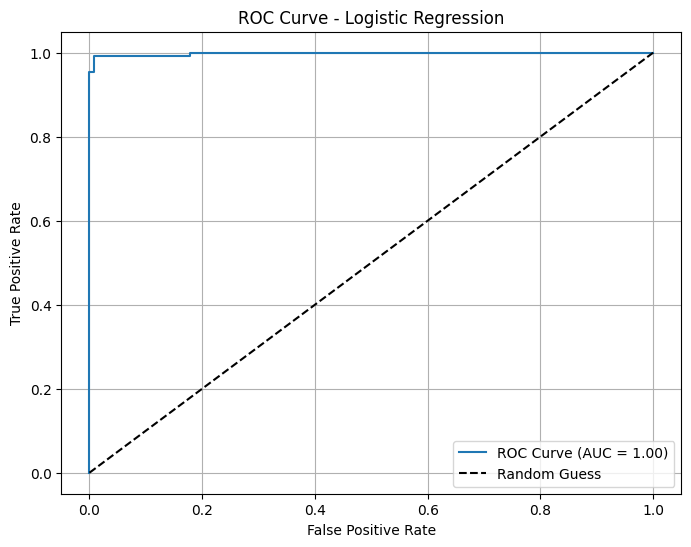

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report Results:")
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))



# Logistic Regression Evaluation and ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

# Predict on training and testing data
y_train_pred_logistic = logistic_model.predict(X_train)
y_test_pred_logistic = logistic_model.predict(X_test)
y_test_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]

# Check for overfitting/underfitting
train_accuracy_logistic = accuracy_score(y_train, y_train_pred_logistic)
test_accuracy_logistic = accuracy_score(y_test, y_test_pred_logistic)

print("Logistic Regression Classification Report Results:")
print(f"Training Accuracy: {train_accuracy_logistic:.2f}")
print(f"Test Accuracy: {test_accuracy_logistic:.2f}")
print(f"{'Overfit' if train_accuracy_logistic > test_accuracy_logistic + 0.1 else 'Well-fit'}\n")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba_logistic)
auc_score_logistic = roc_auc_score(y_test, y_test_proba_logistic)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score_logistic:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()


### Random Forest Classifier

Random Forest Classifier Classification Report Results:
[[133   2]
 [  1 131]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       135
           1       0.98      0.99      0.99       132

    accuracy                           0.99       267
   macro avg       0.99      0.99      0.99       267
weighted avg       0.99      0.99      0.99       267

Accuracy: 0.9887640449438202
Random Forest Results:
Training Accuracy: 1.00
Test Accuracy: 0.99
Well-fit



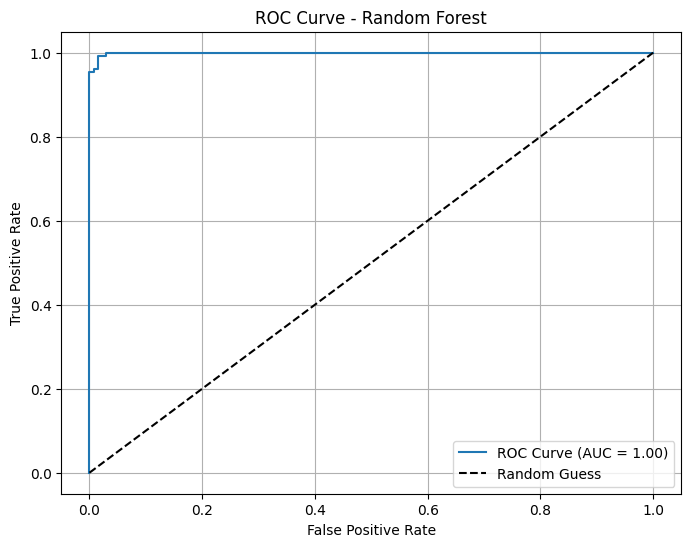

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Classification Report Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))



# Random Forest Evaluation and ROC Curve
# Predict on training and testing data
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)
y_test_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Check for overfitting/underfitting
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print("Random Forest Results:")
print(f"Training Accuracy: {train_accuracy_rf:.2f}")
print(f"Test Accuracy: {test_accuracy_rf:.2f}")
print(f"{'Overfit' if train_accuracy_rf > test_accuracy_rf + 0.1 else 'Well-fit'}\n")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba_rf)
auc_score_rf = roc_auc_score(y_test, y_test_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score_rf:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()


### Gradient Boost Classifier

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       135
           1       0.98      0.99      0.99       132

    accuracy                           0.99       267
   macro avg       0.99      0.99      0.99       267
weighted avg       0.99      0.99      0.99       267

Gradient Boosting Results:
Training Accuracy: 1.00
Test Accuracy: 0.99
Well-fit



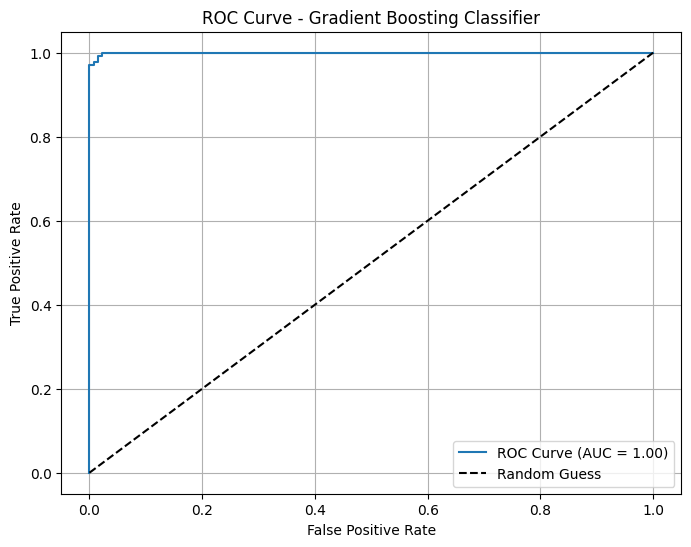

In [36]:
# Gradient Boosting Evaluation and ROC Curve
from sklearn.ensemble import GradientBoostingClassifier

# Train the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
from sklearn.metrics import classification_report

# Generate predictions
y_test_pred_gb = gb_model.predict(X_test)

# Print Classification Report
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_test_pred_gb))

# Predict on training and testing data
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)
y_test_proba_gb = gb_model.predict_proba(X_test)[:, 1]

# Check for overfitting/underfitting
train_accuracy_gb = accuracy_score(y_train, y_train_pred_gb)
test_accuracy_gb = accuracy_score(y_test, y_test_pred_gb)

print("Gradient Boosting Results:")
print(f"Training Accuracy: {train_accuracy_gb:.2f}")
print(f"Test Accuracy: {test_accuracy_gb:.2f}")
print(f"{'Overfit' if train_accuracy_gb > test_accuracy_gb + 0.1 else 'Well-fit'}\n")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba_gb)
auc_score_gb = roc_auc_score(y_test, y_test_proba_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score_gb:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting Classifier")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [37]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Predictions and probabilities for all models
y_test_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_test_pred_logistic = logistic_model.predict(X_test)

y_test_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_test_pred_rf = rf_model.predict(X_test)

y_test_proba_gb = gb_model.predict_proba(X_test)[:, 1]
y_test_pred_gb = gb_model.predict(X_test)

# Evaluation Metrics for each model
models = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, y_test_pred_logistic),
        "F1-Score": f1_score(y_test, y_test_pred_logistic),
        "ROC-AUC": roc_auc_score(y_test, y_test_proba_logistic)
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, y_test_pred_rf),
        "F1-Score": f1_score(y_test, y_test_pred_rf),
        "ROC-AUC": roc_auc_score(y_test, y_test_proba_rf)
    },
    "Gradient Boosting": {
        "Accuracy": accuracy_score(y_test, y_test_pred_gb),
        "F1-Score": f1_score(y_test, y_test_pred_gb),
        "ROC-AUC": roc_auc_score(y_test, y_test_proba_gb)
    }
}

# Display the results in a table-like format
print("Model Performance Comparison:\n")
print(f"{'Model':<20}{'Accuracy':<15}{'F1-Score':<15}{'ROC-AUC':<15}")
print("-" * 50)
for model, metrics in models.items():
    print(f"{model:<20}{metrics['Accuracy']:<15.4f}{metrics['F1-Score']:<15.4f}{metrics['ROC-AUC']:<15.4f}")

# Find the best model based on ROC-AUC
best_model = max(models, key=lambda x: models[x]["ROC-AUC"])
print(f"\nBest Model: {best_model}")


Model Performance Comparison:

Model               Accuracy       F1-Score       ROC-AUC        
--------------------------------------------------
Logistic Regression 0.9738         0.9730         0.9984         
Random Forest       0.9888         0.9887         0.9993         
Gradient Boosting   0.9888         0.9887         0.9996         

Best Model: Gradient Boosting


### Visulization Of the Comparison

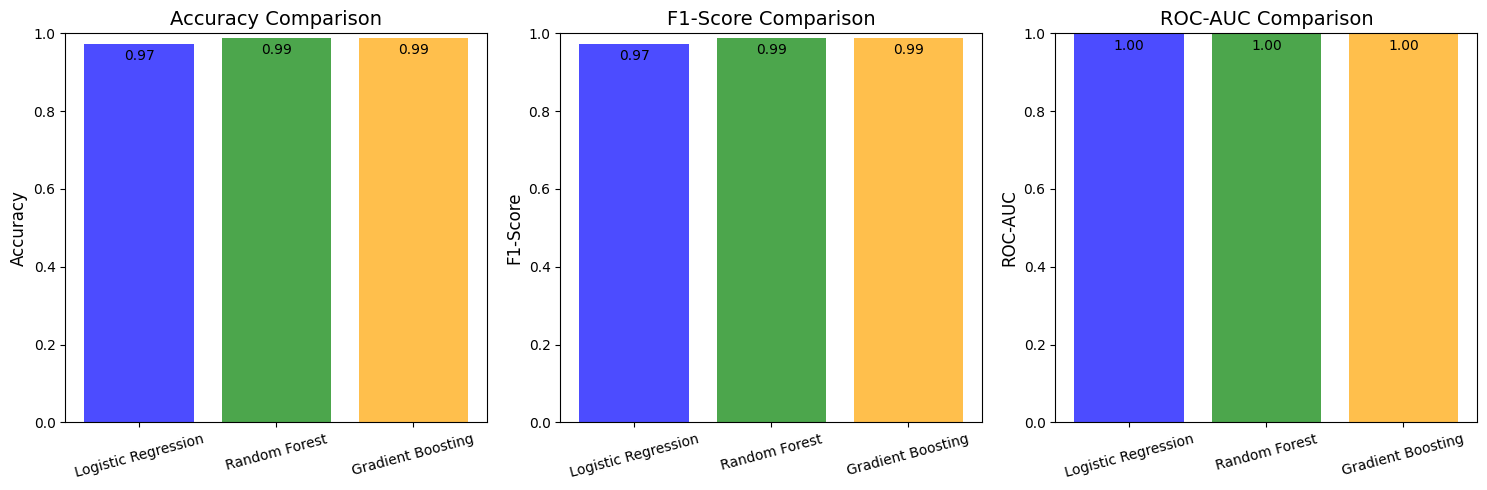

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for each model
model_names = ["Logistic Regression", "Random Forest", "Gradient Boosting"]
accuracy_scores = [models[model]["Accuracy"] for model in model_names]
f1_scores = [models[model]["F1-Score"] for model in model_names]
roc_auc_scores = [models[model]["ROC-AUC"] for model in model_names]

# Plotting Bar Charts
metrics = ["Accuracy", "F1-Score", "ROC-AUC"]
scores = [accuracy_scores, f1_scores, roc_auc_scores]

# Setting up subplots
plt.figure(figsize=(15, 5))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    bars = plt.bar(model_names, scores[i], color=["blue", "green", "orange"], alpha=0.7)
    plt.title(f"{metric} Comparison", fontsize=14)
    plt.ylabel(metric, fontsize=12)
    plt.ylim(0, 1.0)
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f"{bar.get_height():.2f}", 
                 ha="center", va="bottom", fontsize=10, color="black")
    plt.xticks(rotation=15)

plt.tight_layout()
plt.show()
